c:\Users\guilh\OneDrive\Documents\3A\mention\vision\VisualChess


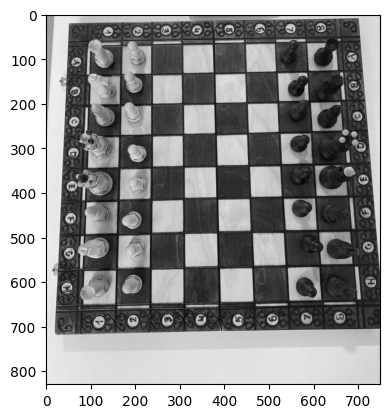

In [88]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import os
print(os.getcwd())

img = cv2.imread('./photos_test/0_rogned.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap = 'gray')
plt.show()


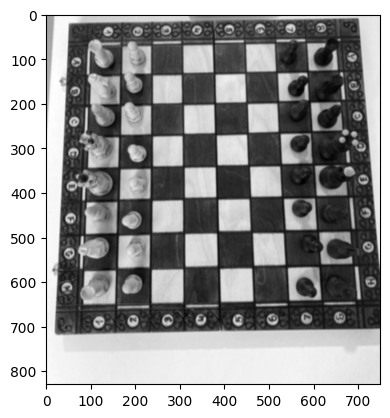

In [89]:
kernel_size = 3
sigma = 1.4

gaussian_blur = cv2.GaussianBlur(img_gray,(5,5),1.4,1.4,cv2.BORDER_DEFAULT)

plt.imshow(gaussian_blur, cmap = 'gray')
plt.show()

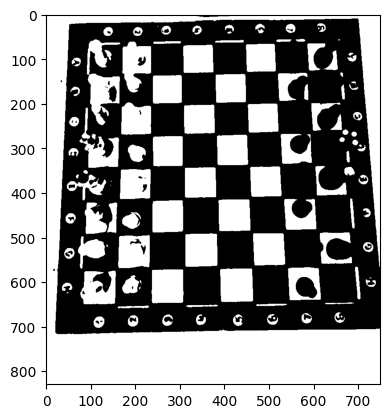

In [90]:
def apply_binary_threshold(img, threshold):
    height, width = img.shape
    binary_image = np.copy(img)
    for i in range(height):
        for j in range(width):
            if img[i,j] >=threshold:
                binary_image[i,j] = 255
            else :
                binary_image[i,j] = 0
    return binary_image

threshold = 128
binary_img = apply_binary_threshold(gaussian_blur, threshold)
plt.imshow(binary_img, cmap = 'gray')
plt.show()

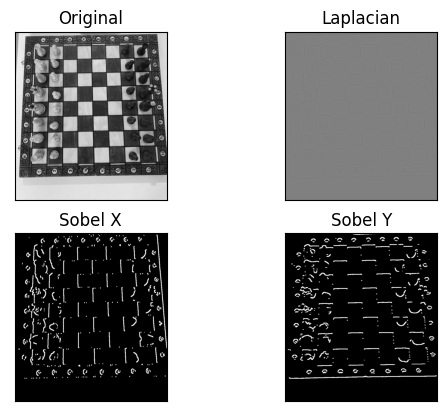

In [91]:
# avec le laplacian
laplacian = cv2.Laplacian(binary_img,cv2.CV_64F)

# avec sobel
sobelx = cv2.Sobel(binary_img,cv2.CV_8UC1,1,0,ksize=5)
sobely = cv2.Sobel(binary_img,cv2.CV_8UC1,0,1,ksize=5)



plt.subplot(2,2,1),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

# Sobel transformations

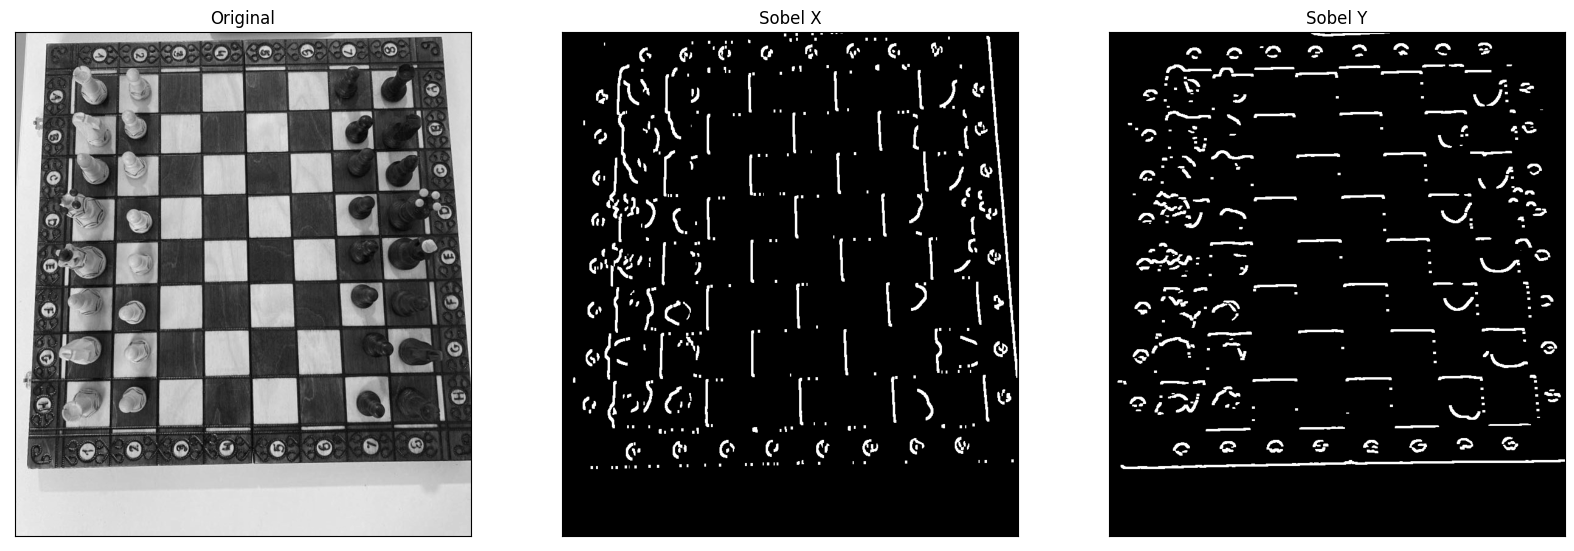

In [92]:
plt.subplots(1, 3, figsize=(20,10))

plt.subplot(1,3,1),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

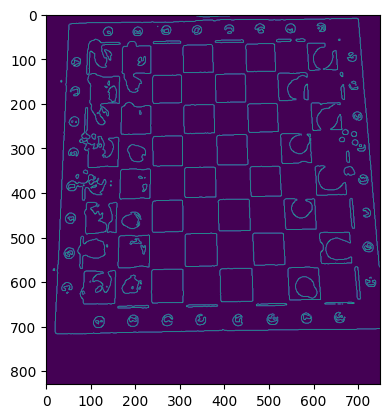

In [93]:
cdst = np.copy(img)

edges = cv2.Canny(binary_img,50,150,apertureSize = 3)

plt.imshow(edges)
plt.show()

lines = cv2.HoughLines(edges, 1, np.pi / 180, 50, None, 0, 0)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(cdst,(x1,y1),(x2,y2),(0,0,255),2)

In [94]:
def get_points_full_line(l, width, height):
    x1, y1, x2, y2 = l[0], l[1], l[2], l[3]

    if x1 == x2 :
        return (x1, 0), (x2, height)
    
    if y1 == y2 :
        return (0, y1), (width, y1)
    
    slope = (y2 - y1) / (x2 - x1)
    ord_origin = y1 - slope * x1

    if y1 < y2 :
        return (0, round(ord_origin)), (round((height - ord_origin) / slope) , height)
    elif y1 > y2 :
        return (0, round(ord_origin)), (round(( - ord_origin) / slope) , 0)

# test = np.copy(img)
# linesP = [ [[86, 435, 88, 382]], [[409, 10, 460, 2]]]

# # Draw the lines
# if linesP is not None:
#     for i in range(0, len(linesP)):
#         l = linesP[i][0]
#         point1, point2 = get_points_full_line(l, img.shape[1], img.shape[0])
#         print(point1, point2)
#         cv2.line(test, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
#         cv2.line(test, point1, point2, (0,0,255), 3, cv2.LINE_AA)

# plt.imshow(cdstP)



In [95]:
def check_line_already_existing(point1, point2, points, epsilon):
    for (x1, y1), (x2, y2)  in points:
        if np.sqrt((point1[0] -x1)**2 + (point1[1] -y1)**2) < epsilon and np.sqrt((point2[0] -x2)**2 + (point2[1] -y2)**2):
            return True
    return False

def dist(p1, p2):
    return np.sqrt((p1[0]- p2[0])**2 + (p1[1]- p2[1])**2)


def get_intersection_between_2_lines(line1, line2): # line is characterized by two points : line = (p1, p2)
    (x1, y1), (x1prime, y1prime) = line1
    (x2, y2), (x2prime, y2prime) = line2
    if x1 == x1prime:
        if x2 == x2prime:
            return None
        slope2 = (y2 - y2prime) / (x2 - x2prime)
        ord_origin2 = y2 - slope2 * x2
        return (x1, round(slope2 * x1 + ord_origin2))
    elif x2 == x2prime:
        slope1 = (y1 - y1prime) / (x1 - x1prime)
        ord_origin1 = y1 - slope1 * x1
        return (x2, round(slope1 * x2 + ord_origin1))
    else:
        slope1 = (y1 - y1prime) / (x1 - x1prime)
        ord_origin1 = y1 - slope1 * x1
        slope2 = (y2 - y2prime) / (x2 - x2prime)
        ord_origin2 = y2 - slope2 * x2
        if slope1 == slope2:
            return None 
        x_int = - (ord_origin2 - ord_origin1) / (slope2 - slope1)
        y_int = slope1 * x_int + ord_origin1
        return (round(x_int), round(y_int))
    
def get_intersections(points):
    intersections = []
    for i in range(len(points)-1):
        for j in range(i+1, len(points)):
            intersections.append(get_intersection_between_2_lines(points[i], points[j]))
    return intersections



In [96]:
img_lines = np.copy(img)
img_lines_prolonged = np.copy(img)

# Probabilistic Line Transform
linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 30, None, 50, 10)
lines = []
length_lines = []

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        length_lines.append(dist((l[0],l[1]),(l[2], l[3])))
        

median_length_lines = np.median(length_lines)
print(median_length_lines)
points = []
# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        if  median_length_lines - 20 < dist((l[0],l[1]),(l[2], l[3])) < median_length_lines +20 :
            point1, point2 = get_points_full_line(l, img.shape[1], img.shape[0])
            if not check_line_already_existing(point1, point2, points, 30) :
                points.append((point1, point2))
                cv2.line(img_lines_prolonged, point1, point2, (0,0,255), 3, cv2.LINE_AA)  
                cv2.line(img_lines, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

intersections = get_intersections(points)

62.00403199585499


In [97]:
img_intersections = np.copy(img)

for point in intersections:
    if point is not None :
        cv2.circle(img_intersections, (point[0], point[1]), 5, (0, 0, 255), -1)

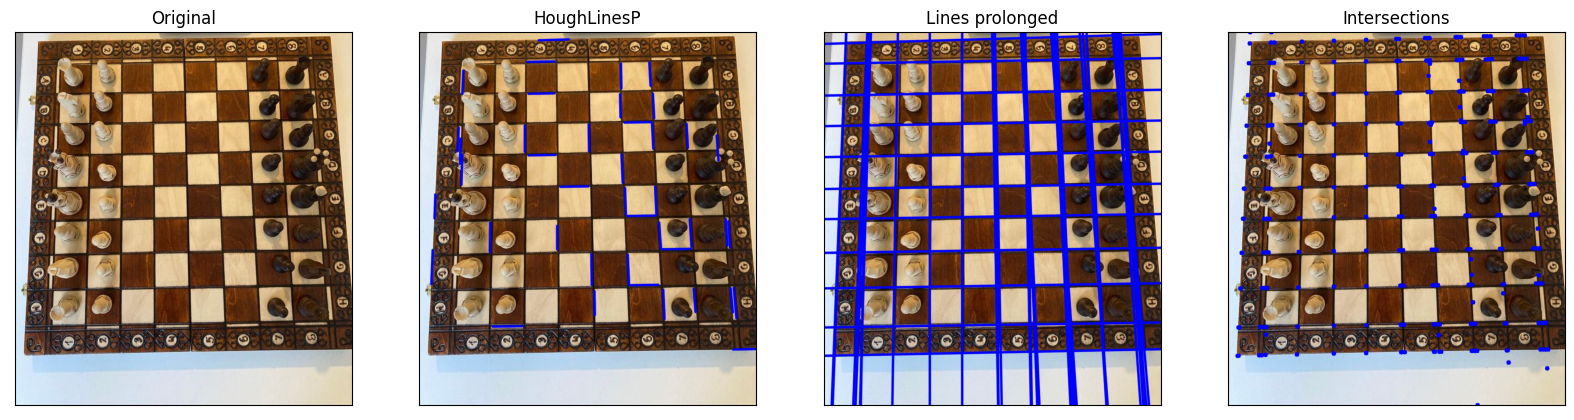

In [98]:
plt.subplots(1, 4, figsize=(20,10))

plt.subplot(1,4,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2),plt.imshow(img_lines)
plt.title('HoughLinesP'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(img_lines_prolonged)
plt.title('Lines prolonged'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(img_intersections)
plt.title('Intersections'), plt.xticks([]), plt.yticks([])
plt.show()

In [99]:
img_gray_lines = np.copy(img_gray)
img_gray_lines_prolonged = np.copy(img_gray)
mask_lines = 255 + np.zeros(img_gray.shape)
mask_intersections = 255 + np.zeros(img_gray.shape)

# Probabilistic Line Transform
linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 30, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        length_lines.append(dist((l[0],l[1]),(l[2], l[3])))

median_length_lines = np.median(length_lines)
print(median_length_lines)

points = []

# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        if  median_length_lines - 20 < dist((l[0],l[1]),(l[2], l[3])) < median_length_lines +20 :
            point1, point2 = get_points_full_line(l, img.shape[1], img.shape[0])
            if not check_line_already_existing(point1, point2, points, 30) :
                points.append((point1, point2))
                cv2.line(img_gray_lines, (l[0], l[1]), (l[2], l[3]), 0, 3, cv2.LINE_AA)
                cv2.line(img_gray_lines_prolonged, point1, point2, 0, 3, cv2.LINE_AA)  
                cv2.line(mask_lines, point1, point2, 0, 3, cv2.LINE_AA)  

intersections = get_intersections(points)

62.00403199585499


In [100]:
img_intersections_gray = np.copy(img_gray)

for point in intersections:
    if point is not None :
        cv2.circle(img_intersections_gray, (point[0], point[1]), 5, (0, 0, 255), -1)
        cv2.circle(mask_intersections, (point[0], point[1]), 5, (0, 0, 255), -1)

C:\Users\guilh\AppData\Local\Temp\ipykernel_8712\4060680468.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1),plt.imshow(img_gray,cmap = 'gray')
C:\Users\guilh\AppData\Local\Temp\ipykernel_8712\4060680468.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,2),plt.imshow(img_gray_lines_prolonged,cmap = 'gray')
C:\Users\guilh\AppData\Local\Temp\ipykernel_8712\4060680468.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,3),plt.imshow(mask_lines,cmap = 'gray')
C:\Users\guilh\AppData\Local\Temp\ipykernel_8712\4060680468.py:9: MatplotlibDeprecationWarning: Auto

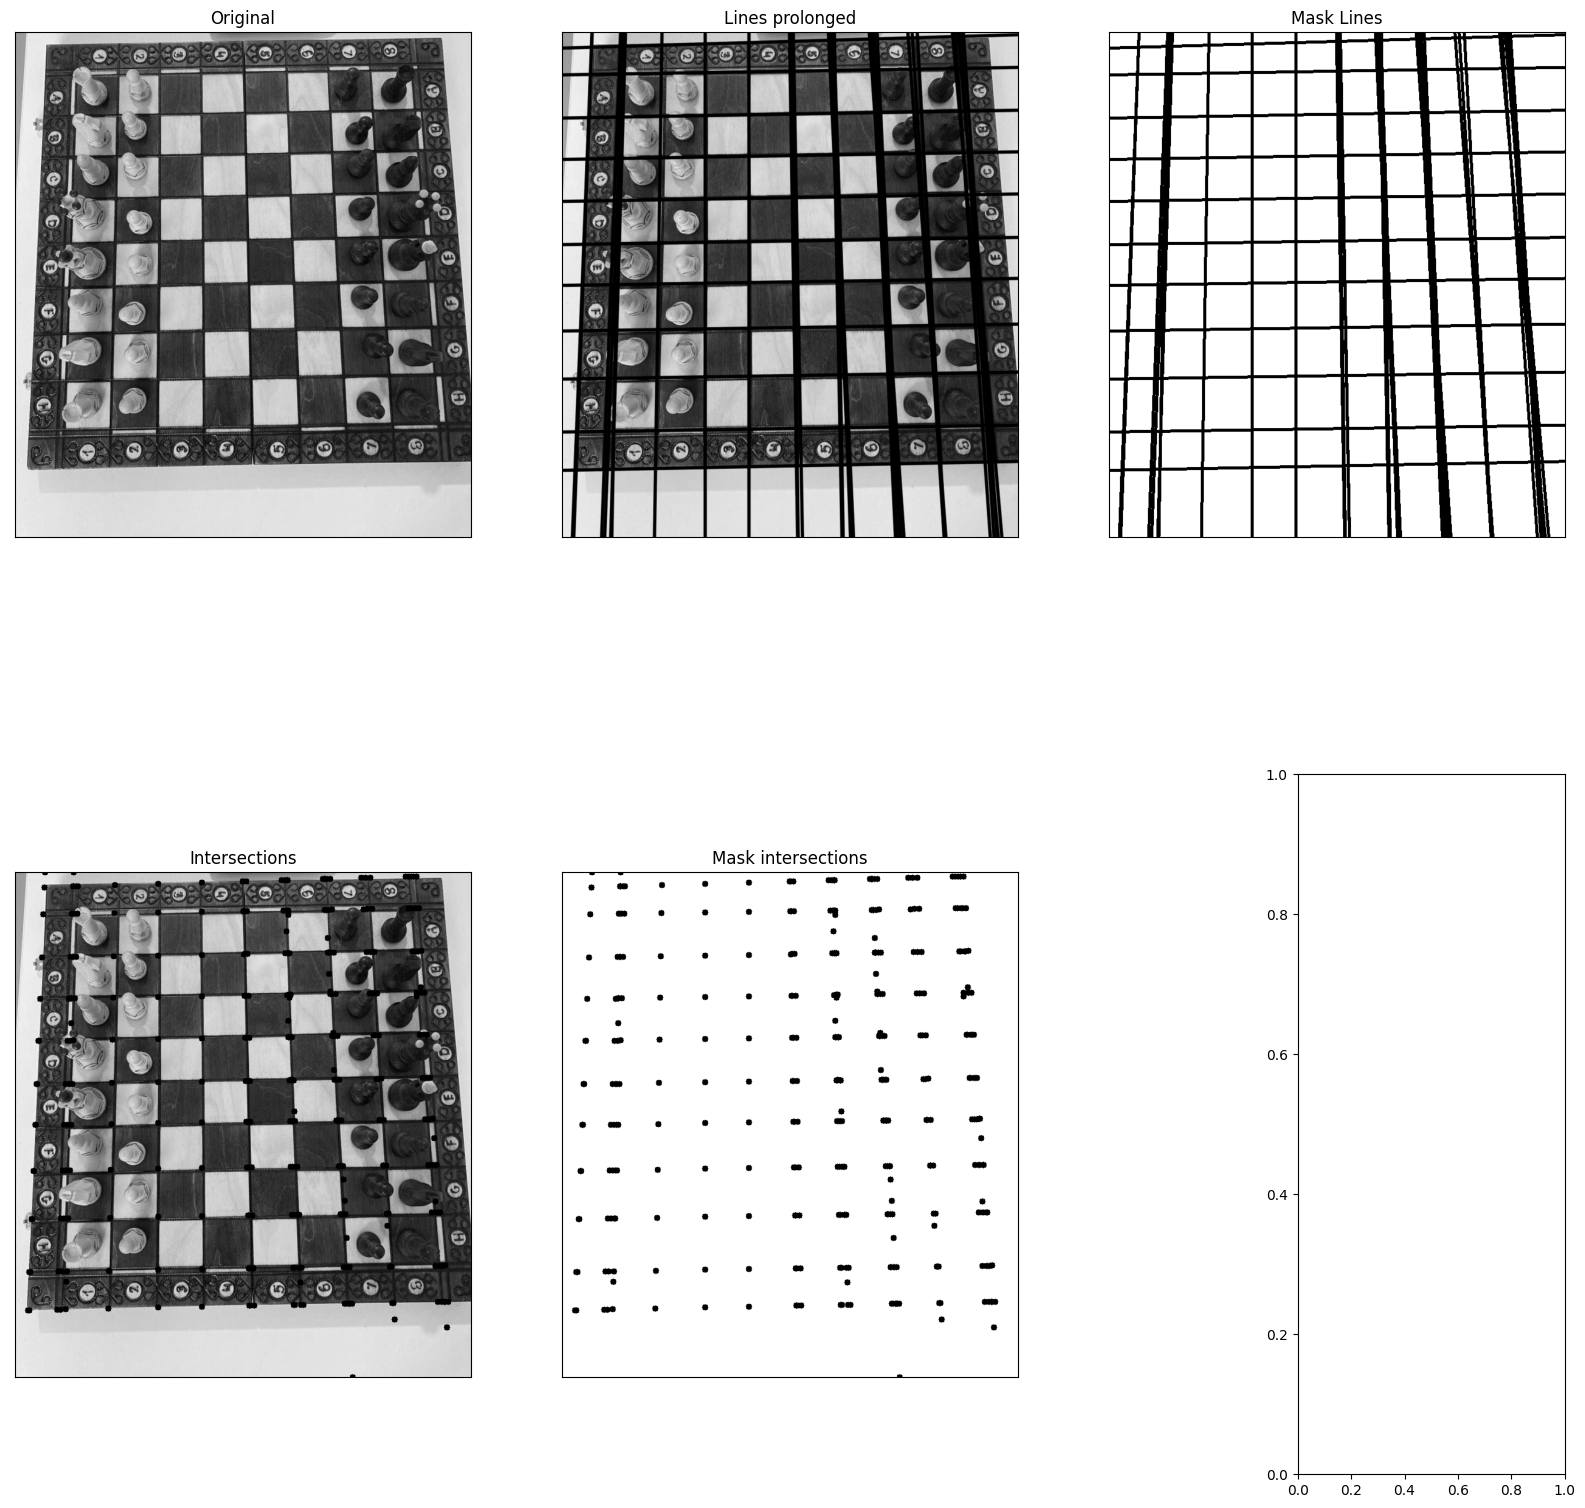

In [101]:
plt.subplots(2, 5, figsize=(20,20))

plt.subplot(2,3,1),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(img_gray_lines_prolonged,cmap = 'gray')
plt.title('Lines prolonged'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(mask_lines,cmap = 'gray')
plt.title('Mask Lines'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(img_intersections_gray,cmap = 'gray')
plt.title('Intersections'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(mask_intersections,cmap = 'gray')
plt.title('Mask intersections'), plt.xticks([]), plt.yticks([])
plt.show()

# group intersections


In [102]:
#clean intersections
old_intersections = np.copy(intersections)

clean_intersections = []

for point in old_intersections:
    if point is None :
        continue
    x, y = point[0], point[1]
    if 0 <= x <= img.shape[1] and 0 <= y <= img.shape[0]:
        clean_intersections.append(point)

print(clean_intersections)


[(468, 650), (76, 656), (547, 649), (85, 656), (468, 650), (385, 651), (307, 652), (540, 649), (384, 651), (71, 656), (550, 649), (707, 646), (698, 647), (700, 647), (235, 653), (154, 655), (691, 647), (85, 656), (545, 649), (457, 650), (23, 657), (619, 648), (617, 648), (616, 648), (703, 647), (25, 657), (541, 649), (392, 651), (547, 649), (471, 650), (459, 650), (470, 711), (464, 563), (469, 674), (457, 409), (450, 271), (447, 202), (453, 342), (438, 13), (441, 63), (444, 133), (460, 484), (449, 244), (453, 341), (74, 719), (80, 569), (85, 415), (91, 277), (93, 207), (88, 348), (100, 23), (98, 68), (96, 139), (83, 490), (92, 248), (551, 709), (83, 718), (470, 711), (386, 712), (307, 714), (542, 709), (385, 712), (69, 719), (554, 709), (712, 706), (702, 706), (706, 706), (235, 715), (153, 717), (695, 706), (83, 718), (548, 709), (458, 711), (21, 720), (622, 708), (622, 708), (620, 708), (707, 706), (23, 720), (544, 709), (393, 712), (550, 709), (474, 711), (460, 711), (543, 562), (534

In [103]:
def moyenne(points):
    return round(np.mean([point[0] for point in points])), round(np.mean([point[1] for point in points]))

def clusteriser_intersections(intersections, epsilon):
    clusters = {}

    for i, point in enumerate(intersections) :
        if point is None :
            continue
        already_in_cluster = False
        for k in clusters.keys():
            if dist(point, moyenne(clusters[k])) <= epsilon:
                already_in_cluster = True
                clusters[k].append(point)
        if not already_in_cluster:
            clusters[i] = [point]

    return clusters

clusters = clusteriser_intersections(clean_intersections, 20)
print(clusters)

{0: [(468, 650), (468, 650), (457, 650), (471, 650), (459, 650)], 1: [(76, 656), (85, 656), (71, 656), (85, 656), (84, 673)], 2: [(547, 649), (540, 649), (550, 649), (545, 649), (541, 649), (547, 649)], 5: [(385, 651), (384, 651), (392, 651)], 6: [(307, 652)], 11: [(707, 646), (698, 647), (700, 647), (691, 647), (703, 647)], 14: [(235, 653)], 15: [(154, 655)], 20: [(23, 657), (25, 657)], 21: [(619, 648), (617, 648), (616, 648)], 31: [(470, 711), (470, 711), (458, 711), (474, 711), (460, 711)], 32: [(464, 563), (465, 563), (455, 563), (467, 563), (457, 563)], 33: [(469, 674)], 34: [(457, 409), (460, 409), (459, 393), (452, 409), (460, 409), (455, 409)], 35: [(450, 271), (455, 271), (449, 271), (454, 271), (452, 271)], 36: [(447, 202), (453, 201), (448, 202), (451, 201), (451, 201), (451, 206)], 37: [(453, 342), (453, 341), (458, 342), (451, 342), (457, 342), (453, 342)], 38: [(438, 13), (447, 13), (445, 13), (442, 13), (448, 13)], 39: [(441, 63), (448, 63), (449, 70), (446, 63), (445, 6

In [104]:
new_intersections = []

for k in clusters.keys():
    new_intersections.append(moyenne(clusters[k]))

print(new_intersections)
print(len(new_intersections))

[(465, 650), (80, 659), (545, 649), (387, 651), (307, 652), (700, 647), (235, 653), (154, 655), (24, 657), (617, 648), (466, 711), (462, 563), (469, 674), (457, 406), (452, 271), (450, 202), (454, 342), (444, 13), (446, 64), (448, 133), (459, 484), (449, 244), (77, 718), (82, 569), (86, 415), (91, 277), (93, 207), (89, 348), (98, 23), (97, 68), (95, 139), (84, 490), (92, 248), (548, 709), (388, 712), (307, 714), (704, 706), (235, 715), (153, 717), (22, 720), (621, 708), (540, 562), (532, 408), (524, 268), (520, 199), (528, 339), (511, 11), (514, 62), (517, 132), (540, 505), (536, 483), (545, 601), (386, 564), (307, 565), (693, 556), (235, 566), (156, 568), (28, 570), (612, 566), (383, 410), (381, 272), (380, 203), (382, 343), (377, 15), (378, 64), (379, 134), (384, 485), (307, 411), (681, 406), (235, 412), (158, 414), (34, 415), (602, 407), (307, 273), (671, 267), (235, 274), (160, 275), (38, 277), (593, 268), (307, 204), (665, 198), (235, 205), (161, 206), (41, 208), (589, 199), (307,

In [105]:
img_new_intersections = np.copy(img)

for point in new_intersections:
    if point is not None :
        cv2.circle(img_new_intersections, (point[0], point[1]), 5, (0, 0, 255), -1)

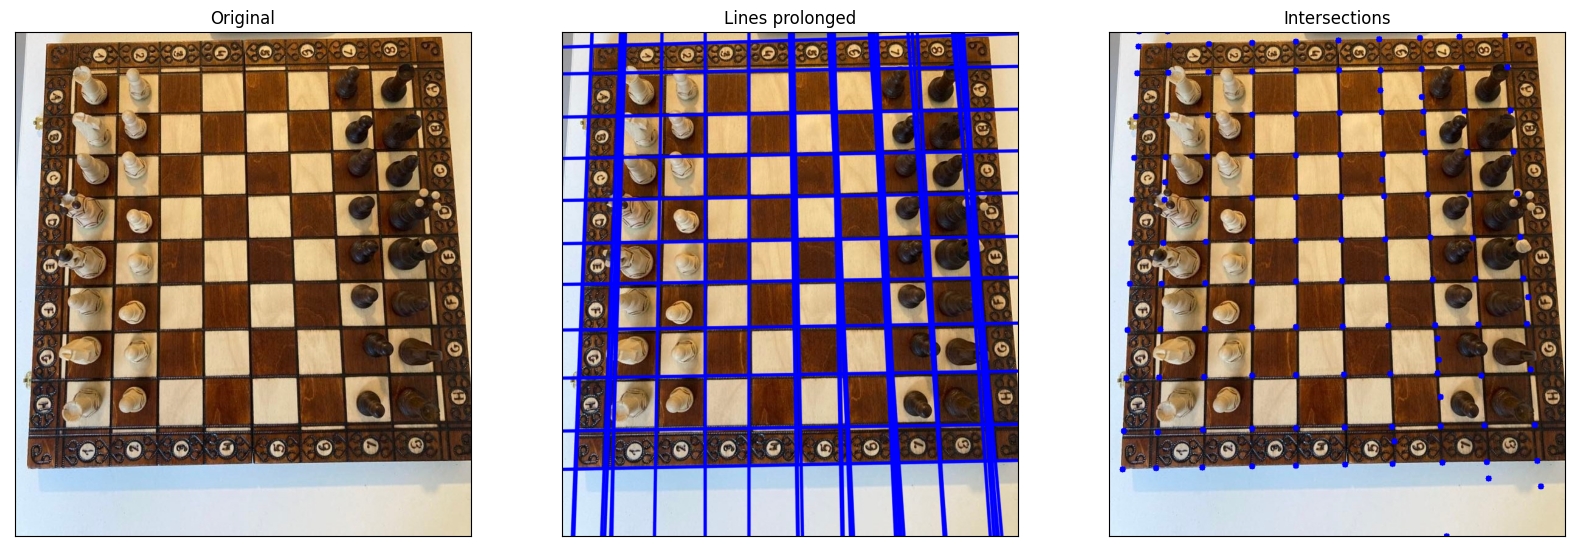

In [106]:
plt.subplots(1, 3, figsize=(20,10))

plt.subplot(1,3,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
# plt.subplot(1,3,2),plt.imshow(img_lines)
# plt.title('HoughLinesP'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img_lines_prolonged)
plt.title('Lines prolonged'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img_new_intersections)
plt.title('Intersections'), plt.xticks([]), plt.yticks([])
plt.show()

In [107]:
def moyenne_y(points):
    return round(np.mean([point[1] for point in points]))

def dist_y(y1, y2):
    return np.abs(y1-y2)

## rendu = liste de liste de 4 points

def clusteriser_y(intersections, epsilon):
    clusters_y = {}

    for i, point in enumerate(intersections) :
        already_in_cluster = False
        for k in clusters_y.keys():
            if dist_y(point[1], moyenne_y(clusters_y[k])) <= epsilon:
                already_in_cluster = True
                clusters_y[k].append(point)
        if not already_in_cluster:
            clusters_y[i] = [point]

    return clusters_y

clusters_y = clusteriser_y(new_intersections, 10)

print(clusters_y)
# for k, v in clusters_y.items():
#     print(k, len(v))


{0: [(465, 650), (80, 659), (545, 649), (387, 651), (307, 652), (700, 647), (235, 653), (154, 655), (24, 657), (617, 648)], 10: [(466, 711), (77, 718), (548, 709), (388, 712), (307, 714), (704, 706), (235, 715), (153, 717), (22, 720), (621, 708)], 11: [(462, 563), (82, 569), (540, 562), (386, 564), (307, 565), (693, 556), (235, 566), (156, 568), (28, 570), (612, 566)], 12: [(469, 674)], 13: [(457, 406), (86, 415), (532, 408), (383, 410), (307, 411), (681, 406), (235, 412), (158, 414), (34, 415), (602, 407)], 14: [(452, 271), (91, 277), (524, 268), (381, 272), (307, 273), (671, 267), (235, 274), (160, 275), (38, 277), (593, 268)], 15: [(450, 202), (93, 207), (520, 199), (380, 203), (307, 204), (665, 198), (235, 205), (161, 206), (41, 208), (589, 199)], 16: [(454, 342), (89, 348), (528, 339), (382, 343), (307, 344), (676, 338), (235, 345), (159, 346), (36, 348), (598, 340)], 17: [(444, 13), (98, 23), (511, 11), (377, 15), (307, 17), (651, 7), (235, 19), (164, 21), (48, 25), (576, 9)], 18

In [108]:
img_anomaly = np.copy(img)
img_non_anomaly = np.copy(img)

clusters_y_no_anomaly = {}

anomaly_points = []
non_anomaly_points = []
for k in clusters_y.keys():
    if len(clusters_y[k]) <=3 :
        for point in clusters_y[k] :
            anomaly_points.append(point)
            cv2.circle(img_anomaly, (point[0], point[1]), 5, (0, 0, 255), -1)

    else :
        clusters_y_no_anomaly[k] = clusters_y[k]
        for point in clusters_y[k] :
            non_anomaly_points.append(point)
            cv2.circle(img_non_anomaly, (point[0], point[1]), 5, (0, 0, 255), -1)


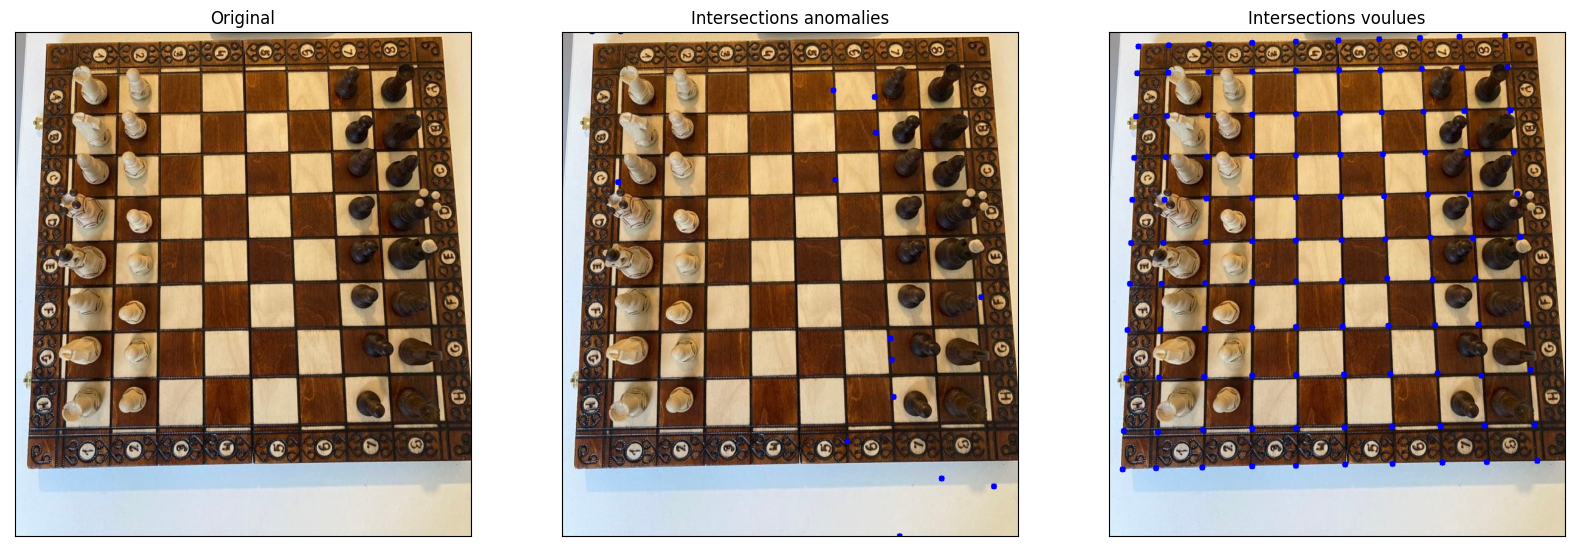

In [109]:
plt.subplots(1, 3, figsize=(20,10))

plt.subplot(1,3,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
# plt.subplot(1,3,2),plt.imshow(img_lines)
# plt.title('HoughLinesP'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img_anomaly)
plt.title('Intersections anomalies'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img_non_anomaly)
plt.title('Intersections voulues'), plt.xticks([]), plt.yticks([])
plt.show()

In [110]:
print(clusters_y_no_anomaly)

{0: [(465, 650), (80, 659), (545, 649), (387, 651), (307, 652), (700, 647), (235, 653), (154, 655), (24, 657), (617, 648)], 10: [(466, 711), (77, 718), (548, 709), (388, 712), (307, 714), (704, 706), (235, 715), (153, 717), (22, 720), (621, 708)], 11: [(462, 563), (82, 569), (540, 562), (386, 564), (307, 565), (693, 556), (235, 566), (156, 568), (28, 570), (612, 566)], 13: [(457, 406), (86, 415), (532, 408), (383, 410), (307, 411), (681, 406), (235, 412), (158, 414), (34, 415), (602, 407)], 14: [(452, 271), (91, 277), (524, 268), (381, 272), (307, 273), (671, 267), (235, 274), (160, 275), (38, 277), (593, 268)], 15: [(450, 202), (93, 207), (520, 199), (380, 203), (307, 204), (665, 198), (235, 205), (161, 206), (41, 208), (589, 199)], 16: [(454, 342), (89, 348), (528, 339), (382, 343), (307, 344), (676, 338), (235, 345), (159, 346), (36, 348), (598, 340)], 17: [(444, 13), (98, 23), (511, 11), (377, 15), (307, 17), (651, 7), (235, 19), (164, 21), (48, 25), (576, 9)], 18: [(446, 64), (97,

In [111]:
min_key = list(clusters_y_no_anomaly.keys())[0]
min_mean_y = moyenne_y(clusters_y_no_anomaly[min_key])
max_key = list(clusters_y_no_anomaly.keys())[0]
max_mean_y = moyenne_y(clusters_y_no_anomaly[min_key])
for k in clusters_y_no_anomaly.keys():
    min_index = clusters_y_no_anomaly[k].index(min(clusters_y_no_anomaly[k], key = lambda x :x[0]))
    clusters_y_no_anomaly[k].pop(min_index)
    mean_y = moyenne_y(clusters_y_no_anomaly[k])
    if mean_y <= min_mean_y:
        min_key = k
        min_mean_y = mean_y

    if mean_y >= max_mean_y:
        max_key = k
        max_mean_y = mean_y

del clusters_y_no_anomaly[min_key]
del clusters_y_no_anomaly[max_key]



In [112]:
img_boxes = np.copy(img)

chess_boxes_points = []
for k in clusters_y_no_anomaly.keys():
    for point in clusters_y_no_anomaly[k]:
        cv2.circle(img_boxes, (point[0], point[1]), 5, (0, 0, 255), -1)
        chess_boxes_points.append(points)

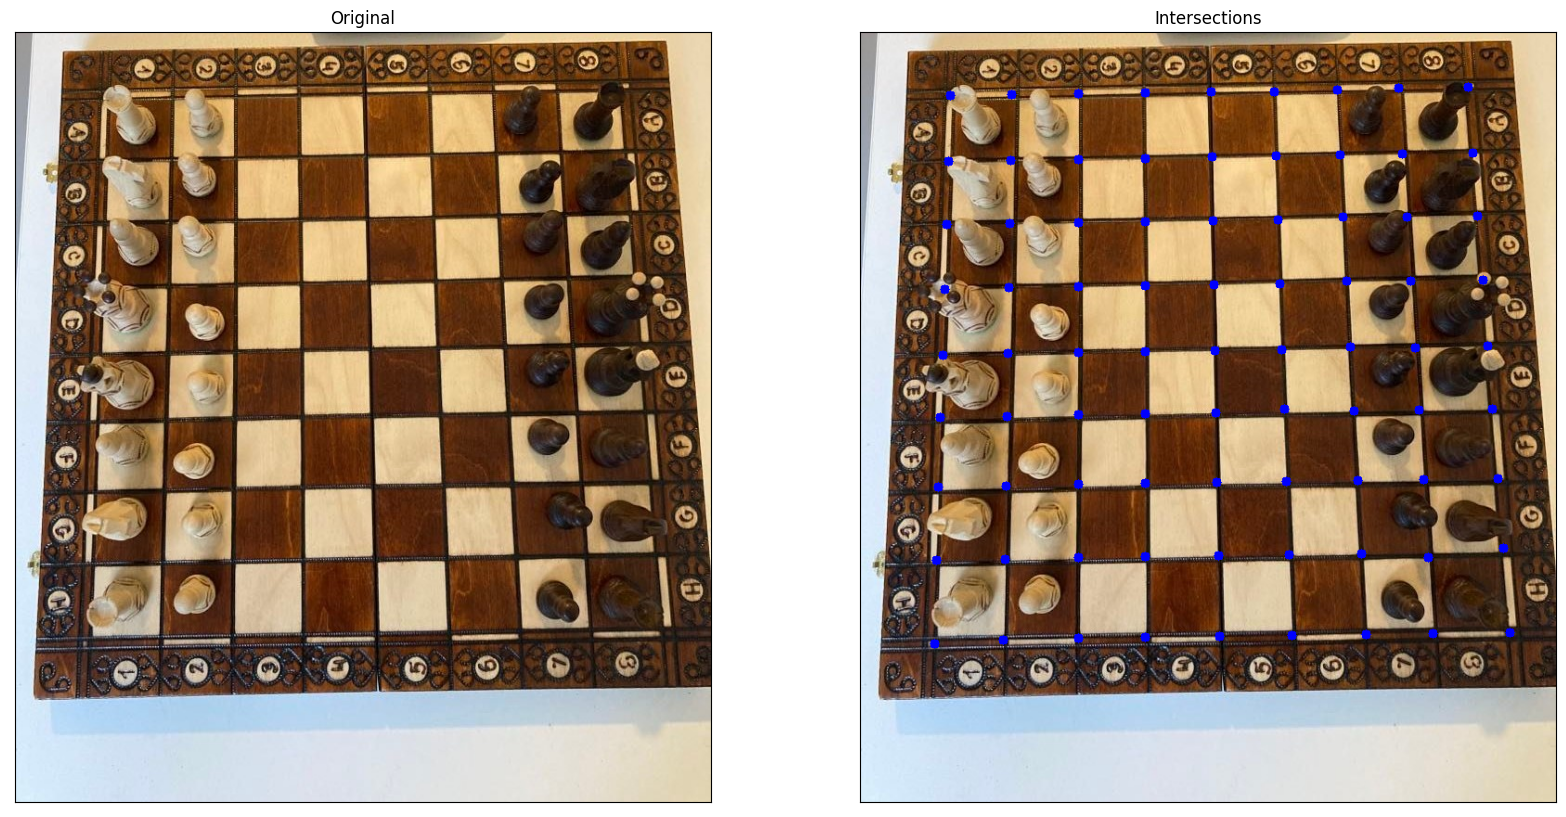

In [113]:
plt.subplots(1, 2, figsize=(20,10))

plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_boxes)
plt.title('Intersections'), plt.xticks([]), plt.yticks([])
plt.show()

In [114]:
cols = {}
moyennes_y = [moyenne_y(clusters_y_no_anomaly[k]) for k in clusters_y_no_anomaly.keys()]
moyennes_y_sorted =  sorted(moyennes_y)
print(clusters_y_no_anomaly)

print(moyennes_y_sorted)

for i, letter in zip(range(len(moyennes_y)), 'abcdefghi'):
    mean = moyennes_y_sorted[i]
    corresponding_k = None
    for k in clusters_y_no_anomaly.keys():
        if moyenne_y(clusters_y_no_anomaly[k]) == mean :
            corresponding_k = k
    cols[letter] = clusters_y_no_anomaly[corresponding_k]

for k in cols.keys():
    cols[k].sort(key=lambda x : x[0])
    
print(cols)

{0: [(465, 650), (80, 659), (545, 649), (387, 651), (307, 652), (700, 647), (235, 653), (154, 655), (617, 648)], 11: [(462, 563), (82, 569), (540, 562), (386, 564), (307, 565), (693, 556), (235, 566), (156, 568), (612, 566)], 13: [(457, 406), (86, 415), (532, 408), (383, 410), (307, 411), (681, 406), (235, 412), (158, 414), (602, 407)], 14: [(452, 271), (91, 277), (524, 268), (381, 272), (307, 273), (671, 267), (235, 274), (160, 275), (593, 268)], 15: [(450, 202), (93, 207), (520, 199), (380, 203), (307, 204), (665, 198), (235, 205), (161, 206), (589, 199)], 16: [(454, 342), (89, 348), (528, 339), (382, 343), (307, 344), (676, 338), (235, 345), (159, 346), (598, 340)], 18: [(446, 64), (97, 68), (514, 62), (378, 64), (307, 65), (655, 59), (235, 66), (163, 67), (580, 60)], 19: [(448, 133), (95, 139), (517, 132), (379, 134), (307, 136), (660, 130), (235, 137), (162, 138), (584, 131)], 20: [(459, 484), (84, 490), (536, 483), (384, 485), (307, 486), (687, 481), (235, 487), (157, 489), (607,

In [115]:
boxes = {}
letters = 'abcdefghi'
nums= '12345678'
for i in range(8):
    for j in range(8):
        letter = letters[i]
        next_letter = letters[i+1]
        num = nums[j]
        boxes[letter+num] = [cols[letter][j], cols[letter][j+1], cols[next_letter][j], cols[next_letter][j+1]]

print(boxes)

{'a1': [(97, 68), (163, 67), (95, 139), (162, 138)], 'a2': [(163, 67), (235, 66), (162, 138), (235, 137)], 'a3': [(235, 66), (307, 65), (235, 137), (307, 136)], 'a4': [(307, 65), (378, 64), (307, 136), (379, 134)], 'a5': [(378, 64), (446, 64), (379, 134), (448, 133)], 'a6': [(446, 64), (514, 62), (448, 133), (517, 132)], 'a7': [(514, 62), (580, 60), (517, 132), (584, 131)], 'a8': [(580, 60), (655, 59), (584, 131), (660, 130)], 'b1': [(95, 139), (162, 138), (93, 207), (161, 206)], 'b2': [(162, 138), (235, 137), (161, 206), (235, 205)], 'b3': [(235, 137), (307, 136), (235, 205), (307, 204)], 'b4': [(307, 136), (379, 134), (307, 204), (380, 203)], 'b5': [(379, 134), (448, 133), (380, 203), (450, 202)], 'b6': [(448, 133), (517, 132), (450, 202), (520, 199)], 'b7': [(517, 132), (584, 131), (520, 199), (589, 199)], 'b8': [(584, 131), (660, 130), (589, 199), (665, 198)], 'c1': [(93, 207), (161, 206), (91, 277), (160, 275)], 'c2': [(161, 206), (235, 205), (160, 275), (235, 274)], 'c3': [(235, 

In [116]:
img_boxes_test = np.copy(img)

for point in boxes['e4']:
    cv2.circle(img_boxes_test, (point[0], point[1]), 5, (0, 0, 255), -1)

for point in boxes['h3']:
    cv2.circle(img_boxes_test, (point[0], point[1]), 5, (0, 0, 255), -1)

for point in boxes['b6']:
    cv2.circle(img_boxes_test, (point[0], point[1]), 5, (0, 0, 255), -1)
    

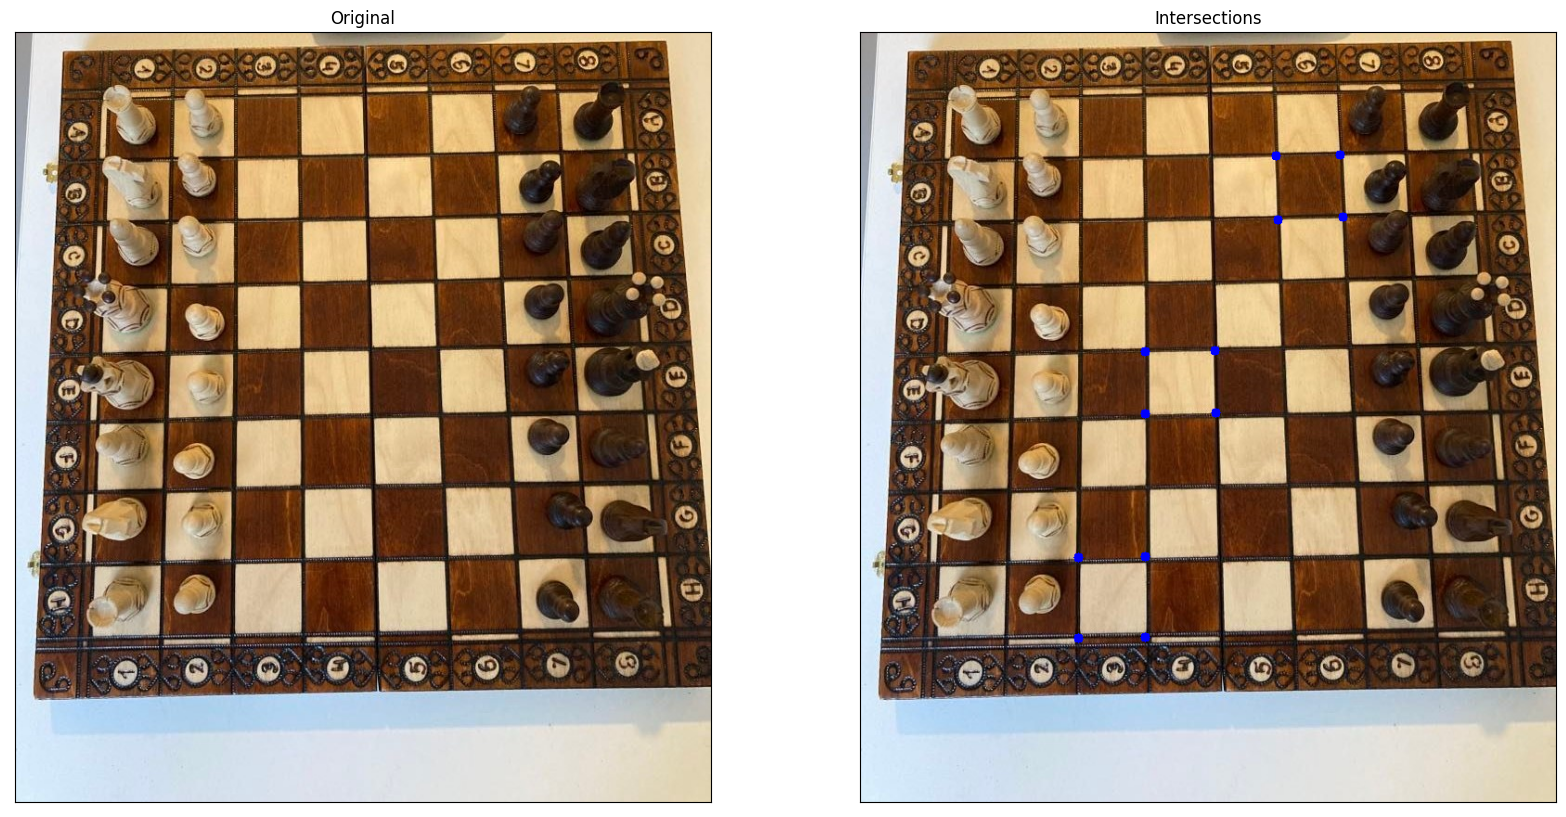

In [117]:
plt.subplots(1, 2, figsize=(20,10))

plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_boxes_test)
plt.title('Intersections'), plt.xticks([]), plt.yticks([])
plt.show()